In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
from app.evaluation import get_cleaned_processed_df
data_frame = get_cleaned_processed_df()
data_frame.head()

,LANGUAGE_APL,LANGUAGE_ASP,LANGUAGE_ApacheConf,LANGUAGE_Assembly,LANGUAGE_Batchfile,LANGUAGE_C,LANGUAGE_C#,LANGUAGE_C++,LANGUAGE_CSS,LANGUAGE_CoffeeScript,LANGUAGE_Common Lisp,LANGUAGE_Cucumber,LANGUAGE_Cuda,LANGUAGE_Emacs Lisp,LANGUAGE_EmberScript,LANGUAGE_Erlang,LANGUAGE_FORTRAN,LANGUAGE_FreeMarker,LANGUAGE_GCC Machine Description,LANGUAGE_GLSL,LANGUAGE_Gnuplot,LANGUAGE_Go,LANGUAGE_Groff,LANGUAGE_Groovy,LANGUAGE_HTML,LANGUAGE_Haskell,LANGUAGE_Java,LANGUAGE_JavaScript,LANGUAGE_Julia,LANGUAGE_Jupyter Notebook,LANGUAGE_Liquid,LANGUAGE_LiveScript,LANGUAGE_Logos,LANGUAGE_Lua,LANGUAGE_M,LANGUAGE_M4,LANGUAGE_Makefile,LANGUAGE_Matlab,LANGUAGE_Objective-C,LANGUAGE_PHP,LANGUAGE_PLSQL,LANGUAGE_Perl,LANGUAGE_PigLatin,LANGUAGE_PostScript,LANGUAGE_Python,LANGUAGE_R,LANGUAGE_REXX,LANGUAGE_Racket,LANGUAGE_Ruby,LANGUAGE_SQLPL,LANGUAGE_Scala,LANGUAGE_Shell,LANGUAGE_Smalltalk,LANGUAGE_Smarty,LANGUAGE_Standard ML,LANGUAGE_Swift,LANGUAGE_TeX,LANGUAGE_TypeScript,LANGUAGE_VimL,LANGUAGE_XSLT,LANGUAGE_Yacc,LANGUAGE_eC,branchesCount,closed_issues,closed_pull_requests,commitsCount,description,forks,hasCiConfig,hasHomepage,hasLicense,isOwnerHomepage,label,mentionableUsers,merged_pull_requests,name,open_issues,open_pull_requests,owner,projects,readme,releasesCount,repository,size,stargazers,tagsCount,watchers
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.526166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.188628,0.0,0.0,0.285207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2,379,这是一个使用 Jekyll 搭建的个人博客，用来快速记录工作，学习，生活的一点一滴。更多分享...,110,0,0,0,0,WEB,1,0,pizn.github.com,2,0,pizn,0,pizngithubcom a hrefhttp://wwwzhanxininfo targ...,0,pizn/pizn.github.com,1783,132,2,18
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996477,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.002571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,9,17,1441,ploeh blog 'source code',135,0,0,0,0,WEB,185,225,ploeh.github.com,4,1,ploeh,0,ploeh blogThis repository contains the templa...,0,ploeh/ploeh.github.com,12074,19,8,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.457166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.536208,0.0,0.0,0.005245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.001381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,63,29,1046,The Propel website and documentation.,155,0,0,0,0,WEB,130,274,propelorm.github.com,15,1,propelorm,0,The Propel WebsiteBuildStatushttps://travis-ci...,0,propelorm/propelorm.github.com,8907,104,0,9
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027969,0.0,0.0,0.137785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071071,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,58,滚蛋吧！莆田系,43,0,0,0,0,WEB,2,1,putianxi.github.io,0,0,putianxi,0,/assets/images/screenshot/indexjpg https://p...,0,putianxi/putianxi.github.io,1816,241,1,10
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,20,7,282,PwnWiki - The notes section of the pentesters ...,139,0,0,0,0,WEB,27,66,pwnwiki.github.io,18,2,pwnwiki,0,PwnWikiio - The notes section of the pentester...,0,pwnwiki/pwnwiki.github.io,824,273,0,70


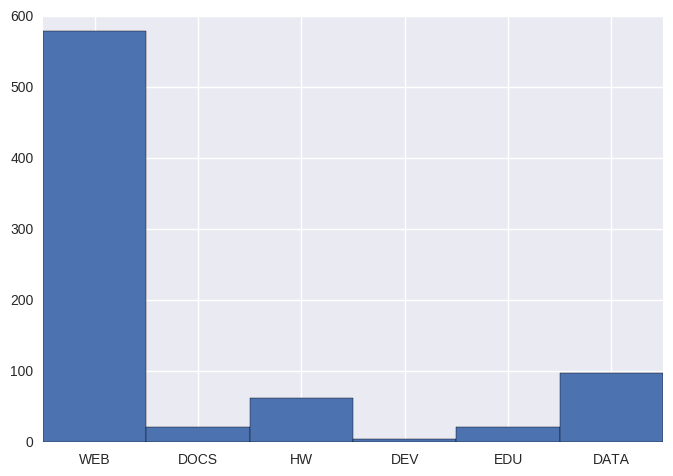

In [2]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


labels, values = zip(*Counter(data_frame['label']).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

/home/madness/Documents/Projects/git_better/venv/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
  0%|          | 0/10 [00:00<?, ?it/s]/home/madness/Documents/Projects/git_better/venv/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:694: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
100%|██████████| 10/10 [00:26<00:00,  2.49s/it]


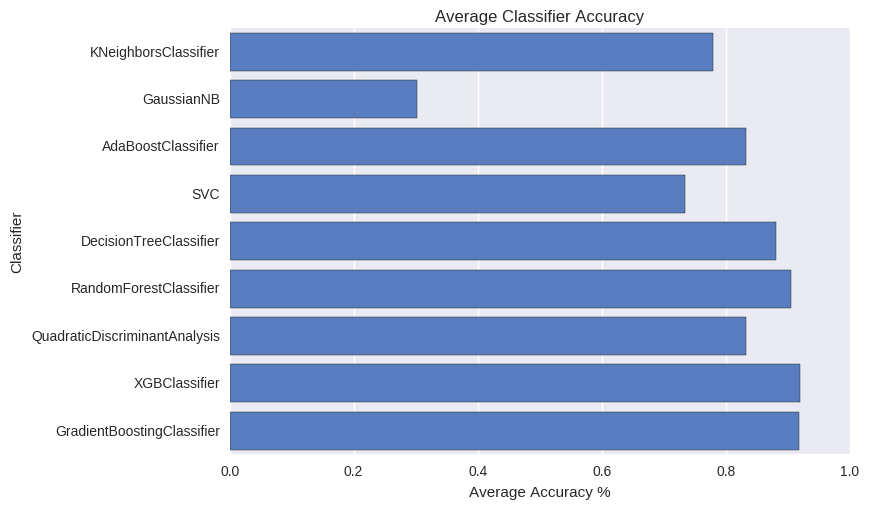

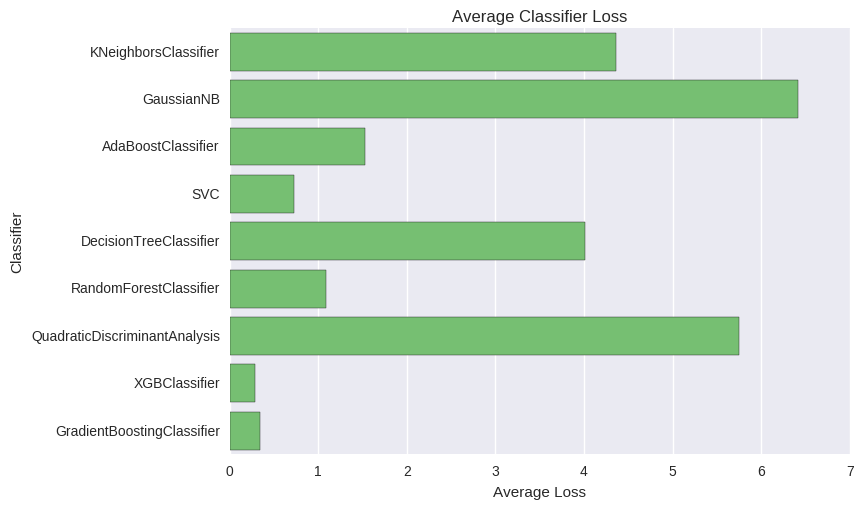

In [3]:
"""Compare 9 classifiers"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from tqdm import tqdm
sns.set_color_codes("muted")

#data_frame = pd.read_csv('data/processed_data.csv')


le = LabelEncoder().fit(data_frame.label) 
labels = le.transform(data_frame.label)
sss = StratifiedShuffleSplit(labels, 10, test_size=0.3, random_state=23)

data_frame.drop('readme', axis=1, inplace=True)
data_frame.drop('description', axis=1, inplace=True)
data_frame.drop('repository', axis=1, inplace=True)
data_frame.drop('owner', axis=1, inplace=True)
data_frame.drop('name', axis=1, inplace=True)
data_frame.drop('label', axis=1, inplace=True)
data_frame.fillna(0, inplace=True)

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    #NuSVC(probability=True),
    DecisionTreeClassifier(class_weight='balanced'),
    RandomForestClassifier(class_weight='balanced'),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    #LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier()]

classifier_accs = {}
classifier_loss = {}
for clf in classifiers:
    classifier_accs[clf.__class__.__name__] = 0
    classifier_loss[clf.__class__.__name__] = 0

for train_index, test_index in tqdm(sss):
    X_train, X_test = data_frame.values[train_index], data_frame.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    for clf in classifiers:
        clf.fit(X_train, y_train)
        name = clf.__class__.__name__
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        classifier_accs[name] += acc

        train_predictions = clf.predict_proba(X_test)
        ll = log_loss(y_test, train_predictions)
        classifier_loss[name] += ll

avg_acc = {k: v / len(sss) for k, v in classifier_accs.iteritems()}
avg_loss = {k: v / len(sss) for k, v in classifier_loss.iteritems()}
avg_df = pd.DataFrame([[name, acc, avg_loss[name]] for name, acc in avg_acc.iteritems()], columns=['Classifier', 'Avg Accuracy', 'Avg Loss'])

sns.barplot(x='Avg Accuracy', y='Classifier', data=avg_df, color="b")
plt.xlabel('Average Accuracy %')
plt.title('Average Classifier Accuracy')
plt.show()

sns.barplot(x='Avg Loss', y='Classifier', data=avg_df, color="g")
plt.xlabel('Average Loss')
plt.title('Average Classifier Loss')
plt.show()

/home/madness/Documents/Projects/git_better/venv/local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:259: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  return aux[:-1][aux[1:] == aux[:-1]]


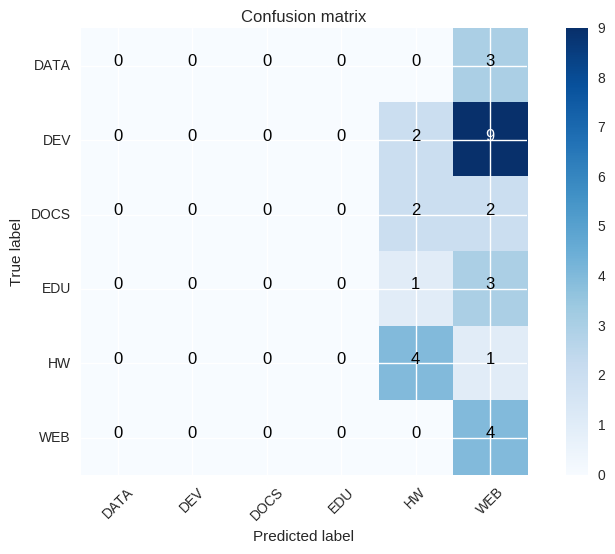

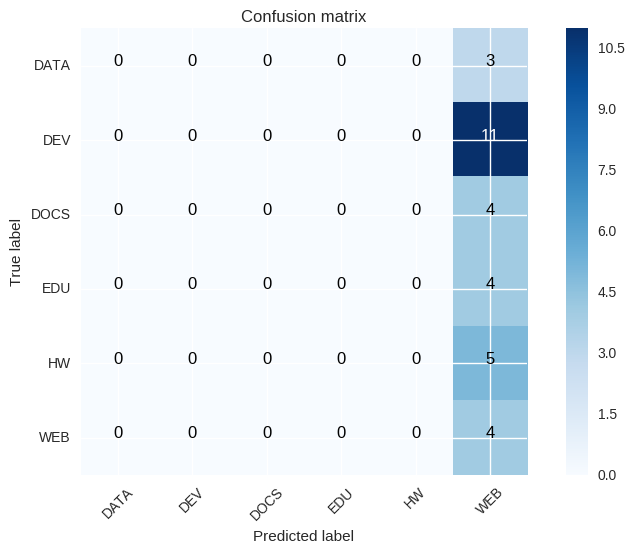

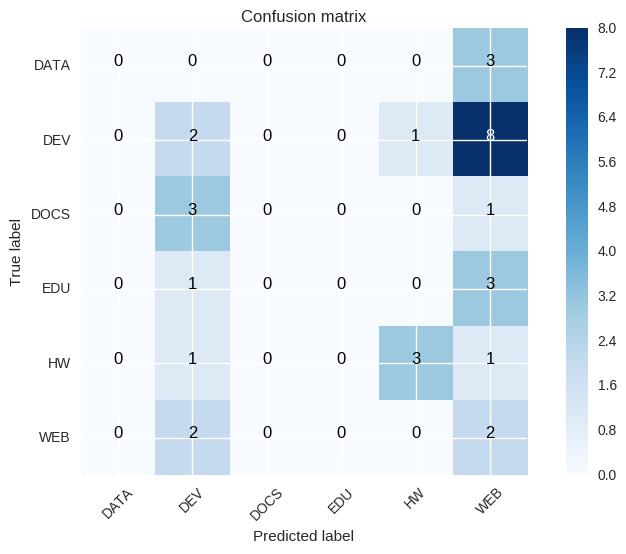

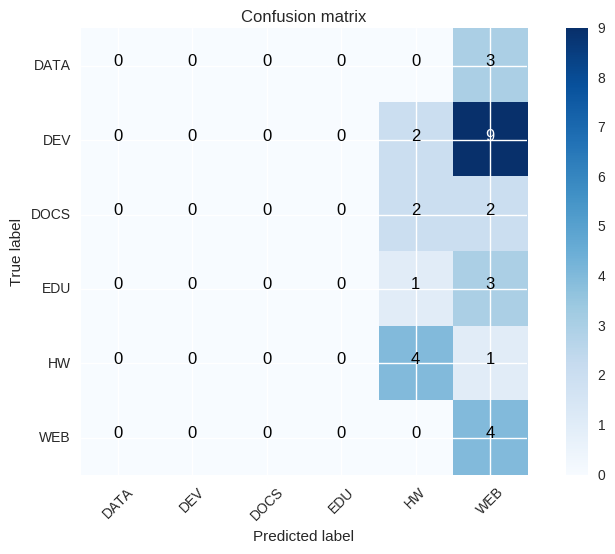

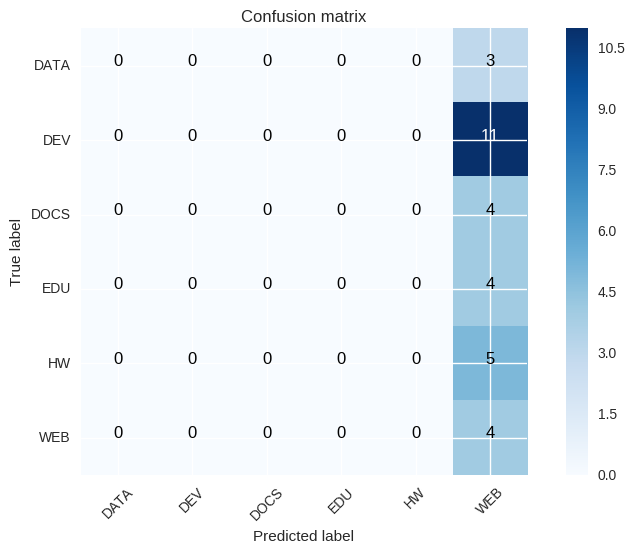

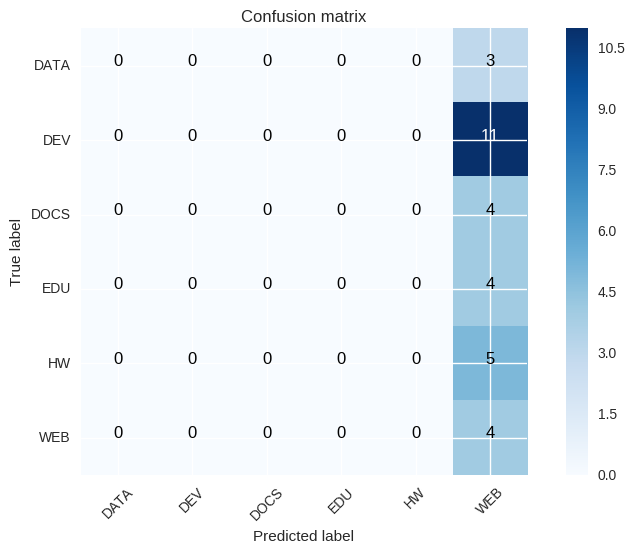

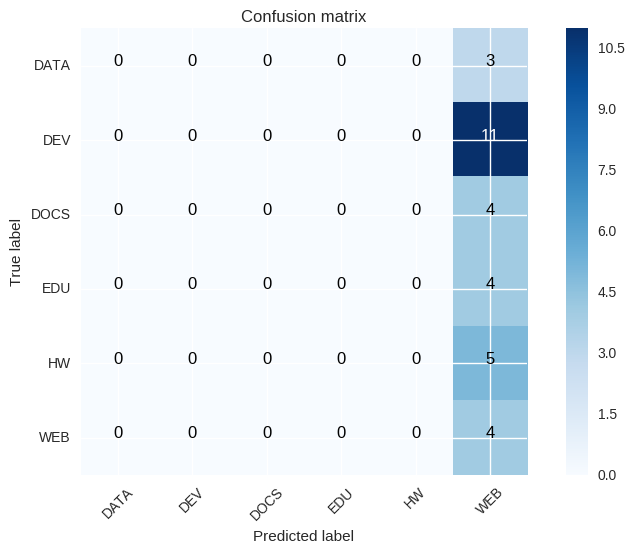

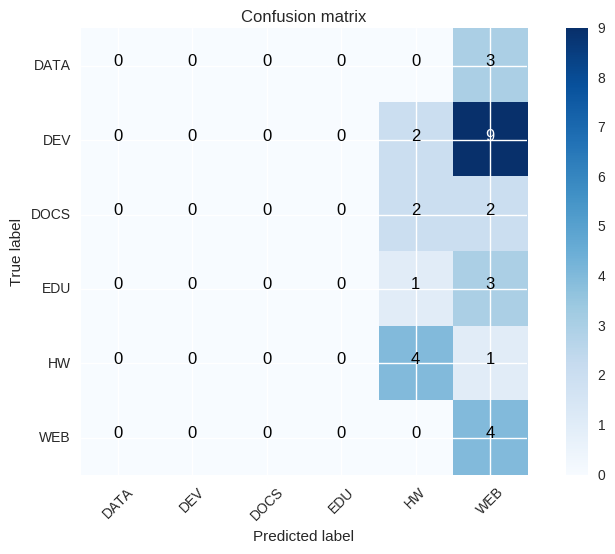

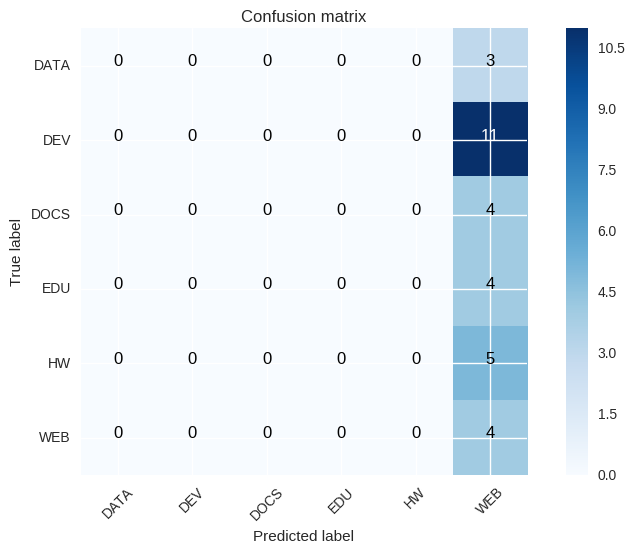

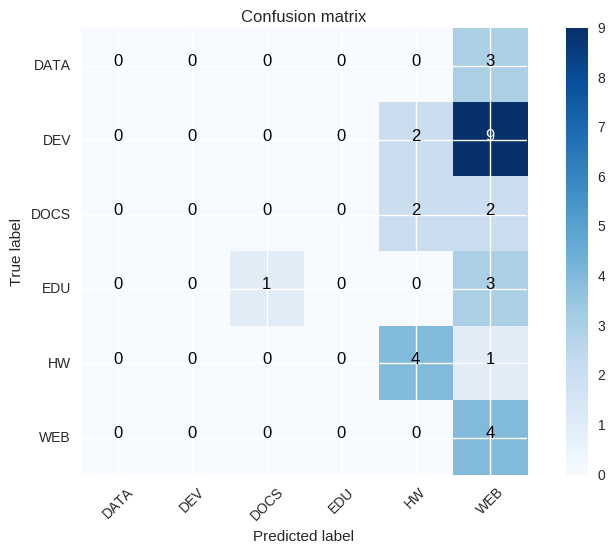

0.190322580645


In [4]:
"""Learn one classifier on the training set and evaluate it on the validation set"""

from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsOneClassifier
from app.evaluation import get_accuracy_and_plot_confusion, get_training_and_validation_df

X_train, y_train, X_valid, y_valid = get_training_and_validation_df()

le = LabelEncoder().fit(y_train)
labels = le.transform(y_train)  
classes = le.classes_
acc = 0

sss = StratifiedShuffleSplit(labels, 10, test_size=0.3, random_state=23)
for train_index, test_index in sss:
    X_train_tmp, X_test_tmp = X_train[train_index], X_train[test_index]
    y_train_tmp, y_test_tmp = y_train[train_index], y_train[test_index]

    clf = XGBClassifier()
    clf.fit(X_train_tmp, y_train_tmp)
    y_pred = clf.predict(X_valid)
    acc += get_accuracy_and_plot_confusion(y_valid, y_pred, classes)
    
print acc/len(sss)